# [LAB 7-2] MNIST data

- [실습 동영상 7-2](https://youtu.be/ktd5yrki_KA): MNIST data
- [실습 슬라이드 7](https://docs.google.com/presentation/d/1cVwqMpERToATs1JGYps0F3MLARP8OAlw6ZIe-lpPHYs)
- download MNIST dataset: http://yann.lecun.com/exdb/mnist/
- 참고자료: https://www.tensorflow.org/get_started/mnist/beginners

### MNIST dataset
- 우편번호를 컴퓨터가 자동으로 읽도록 만들어둔 데이터셋
- 28x28 이미지로 각각 구성됨(784=28*28)

In [1]:
28*28

784

In [13]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

# download from web automatically

# tensorflow.org/get_started/mnist/beginners
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_from_tf_tutorials/", one_hot=True)

# download from http://yann.lecun.com/exdb/mnist/
# mnist = input_data.read_data_sets("MNIST_from_yann_lecun/", one_hot=True) # one_hot=True로 읽어오면서 one_hot으로 변환해서 읽어오게 한다.

nb_classes = 10
learning_rate = 0.1

# MNIST data image of shape 28*28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0~9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# SOFTMAX

# hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


Extracting MNIST_from_tf_tutorials/train-images-idx3-ubyte.gz
Extracting MNIST_from_tf_tutorials/train-labels-idx1-ubyte.gz
Extracting MNIST_from_tf_tutorials/t10k-images-idx3-ubyte.gz
Extracting MNIST_from_tf_tutorials/t10k-labels-idx1-ubyte.gz


## Training epoch/batch
- 데이터셋이 너무 많아 한번에 학습시킬 수 없어서 batch로 나누어 학습시킴
- epoch: 전체 데이터셋
- `epoch = batch_size * iteration`
- 전체 데이터셋(epoch)을 학습시키려면 일정 단위로 나누어진 크기(batch_size)만큼 일정 횟수 반복해야 한다(iteration)

Epoch:  0001 
cost =  2.456239583
Learning finished
Accuracy:  0.7643
Label:  [5]
Prediction:  [5]


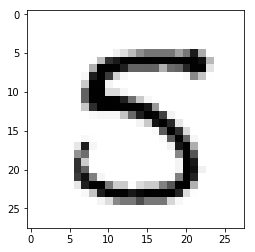

Epoch:  0002 
cost =  1.056866957
Learning finished
Accuracy:  0.8137
Label:  [8]
Prediction:  [3]


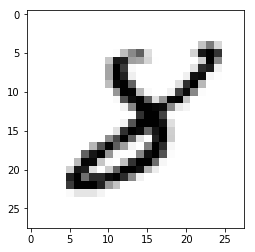

Epoch:  0003 
cost =  0.852858128
Learning finished
Accuracy:  0.8374
Label:  [7]
Prediction:  [7]


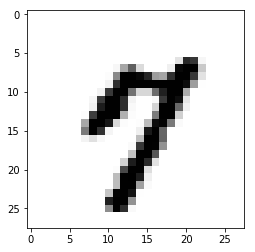

Epoch:  0004 
cost =  0.751074103
Learning finished
Accuracy:  0.8498
Label:  [2]
Prediction:  [2]


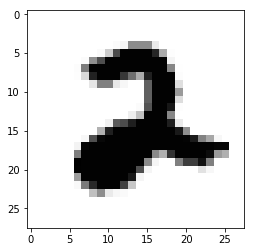

Epoch:  0005 
cost =  0.686652086
Learning finished
Accuracy:  0.8563
Label:  [0]
Prediction:  [0]


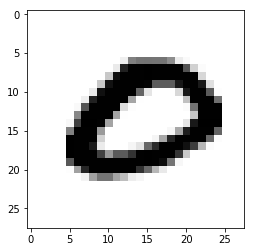

In [12]:
training_epochs = 5
batch_size = 100

with tf.Session() as sess:
    # Initialize Tensorflow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        
        print("Epoch: ", "%04d" % (epoch + 1), "\ncost = ", "{:.9f}".format(avg_cost))
        
        print("Learning finished")

        # Test the model using test sets
        print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
              X: mnist.test.images, Y: mnist.test.labels}))

        # Get one and predict
        r = random.randint(0, mnist.test.num_examples - 1)
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
        print("Prediction: ", sess.run(
            tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

        plt.imshow(
            mnist.test.images[r:r + 1].reshape(28, 28),
            cmap='Greys',
            interpolation='nearest')
        plt.show()